<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [156]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [157]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 0, "Median value of owner-occupied homes in $1000's")

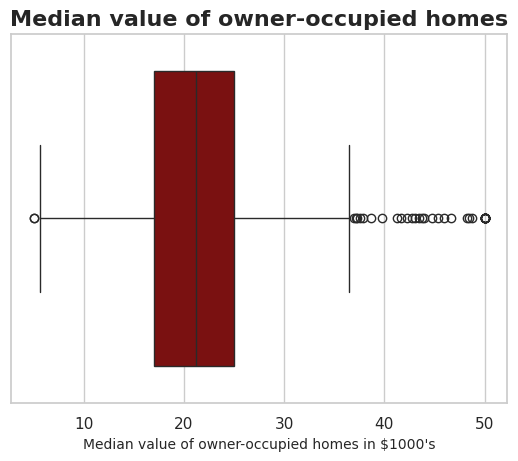

In [158]:
## GENERATE DESCRIPTIVE STATISTICS AND VISUALISATIONS
#  For the "Median value of owner-occupied homes" provide a boxplot
fig1 = sns.boxplot(x= boston_df['MEDV'], color='darkred')
fig1.set_title("Median value of owner-occupied homes", fontsize=16, fontweight='bold')
fig1.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=10)

<ipython-input-159-ac366318e29e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig2 = sns.catplot(boston_df, x=boston_df['CHAS'], y=boston_df['MEDV'],kind="bar", height=4.5, aspect=0.8,errorbar=None,palette=['darkred', 'darkblue'])


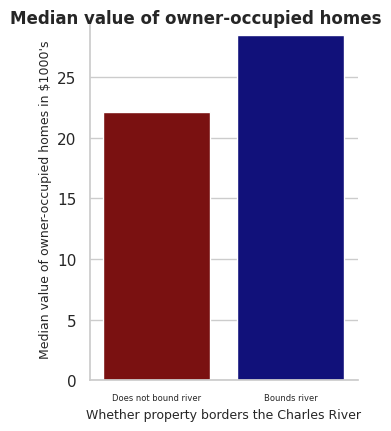

In [159]:
#  Provide a  bar plot for the Charles river variable
fig2 = sns.catplot(boston_df, x=boston_df['CHAS'], y=boston_df['MEDV'],kind="bar", height=4.5, aspect=0.8,errorbar=None,palette=['darkred', 'darkblue'])
fig2.set_xticklabels(["Does not bound river", "Bounds river"], fontsize=6).fig.suptitle("Median value of owner-occupied homes", fontsize=12, fontweight='bold')
fig2.set_axis_labels("Whether property borders the Charles River", "Median value of owner-occupied homes in $1000's",fontsize=9)

<ipython-input-160-5e9ded3874bb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig3 = sns.boxplot(boston_df, x=boston_df['age_group'], y=boston_df['MEDV'], order=['<= 35%', 'between 35% and 70%', '> 70%'],palette=['darkred', 'darkblue','darkgreen'])


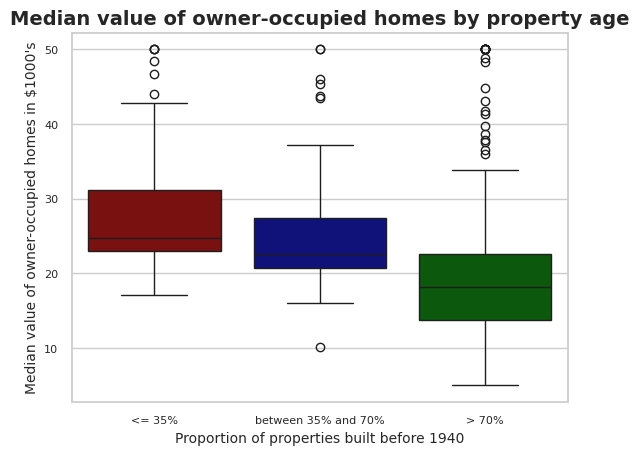

In [160]:
#Provide a boxplot for the MEDV variable vs the AGE variable.

# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
# Add new column called 'age_group'
boston_df['age_group'] = ""
# Assign values to new column called 'age_group'
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<= 35%'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35% and 70%'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '> 70%'


fig3 = sns.boxplot(boston_df, x=boston_df['age_group'], y=boston_df['MEDV'], order=['<= 35%', 'between 35% and 70%', '> 70%'],palette=['darkred', 'darkblue','darkgreen'])
fig3.set_title("Median value of owner-occupied homes by property age", fontsize=14, fontweight='bold')
fig3.set_xlabel("Proportion of properties built before 1940", fontsize=10)
fig3.set_ylabel("Median value of owner-occupied homes in $1000's", fontsize=10)
fig3.tick_params(axis='both', labelsize=8)

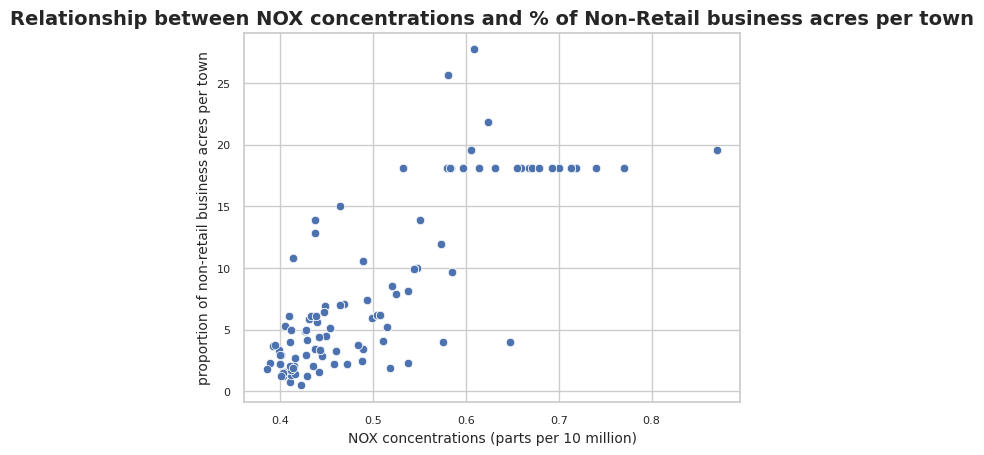

In [161]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

fig4 = sns.scatterplot(boston_df, x=boston_df['NOX'], y=boston_df['INDUS'])
fig4.set_title("Relationship between NOX concentrations and % of Non-Retail business acres per town", fontsize=14, fontweight='bold')
fig4.set_xlabel("NOX concentrations (parts per 10 million)", fontsize=10)
fig4.set_ylabel("proportion of non-retail business acres per town", fontsize=10)
fig4.tick_params(axis='both', labelsize=8)

## data appears positively correlated

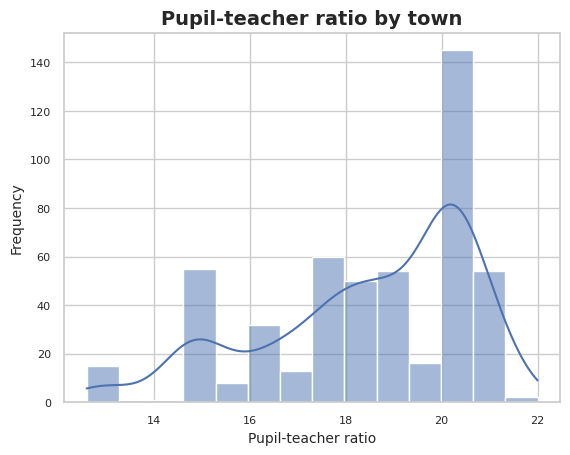

In [162]:
#Create a histogram for the pupil to teacher ratio variable
fig5 = sns.histplot(boston_df, x=boston_df['PTRATIO'], kde=True)
fig5.set_title("Pupil-teacher ratio by town", fontsize=14, fontweight='bold')
fig5.set_xlabel("Pupil-teacher ratio", fontsize=10)
fig5.set_ylabel("Frequency", fontsize=10)
fig5.tick_params(axis='both', labelsize=8)

### Is there a significant difference in median value of houses bounded by the Charles river or not?

In [163]:
# H0: The median values of houses by the Charles river is the same as houses not by the Charles river.
# H1: The median values of houses by the Charles river is not the same as houses not by the Charles river.
# α = 0.05

# check whether variances are equal
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [164]:
# since the p-value is less than 0.05 we cannot assume that the variances are the same.
# But, for the purpose of this exercise, we will assume the variances are equal so that we can perform a t-test.

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [165]:
# Since the p-value is less than 0.05, we reject the null hypothesis as there is sufficient evidence being bounded by the Charles river impacts median house prices.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940?

In [166]:
# H0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (i.e. the 3 population means are equal).
# H1: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (i.e. the 3 population means are not equal).
# α = 0.05

# put groups into objects
thirtyfive_lower = boston_df[boston_df['age_group'] == '<= 35%']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35% and 70%']['MEDV']
seventy_higher = boston_df[boston_df['age_group'] == '> 70%']['MEDV']

# run ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [167]:
# Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [168]:
# H0: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
# H1: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
# α = 0.05

# calculate Pearson correlation co-efficient
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [169]:
# Since the p-value (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between  Nitric oxide concentrations 
# and the proportion of non-retail business acres.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [170]:
# H0: Beta1 = 0, i.e. the median value of owner occupied home is not impacted by distance to the five Boston employment centres.
# H1: Beta1 is not equal to 0, i.e. the median value of owner occupied home is impacted by distance to the five Boston employment centres.
# α = 0.05

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        09:42:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# R-square is 0.062, R will be √0.062, which is an R value of approximately 0.25. So, there is some evidence of a correlation between the distance to employment centres and property value.
# The coefficient is approximately 1.1, so there is a ~10% increase in property value as the distance from the employment centre increases.